# Group Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns; sns.set()

### Get Pima data

In [2]:
master_dataframe = pd.read_csv("pima_diabetes.csv")
master_dataframe.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True

In [3]:
# drop returns a copy
df = master_dataframe.drop(['skin'], axis=1) 

In [4]:
# note the mean of "insulin"
df["insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64

In [6]:
# select the columns where zeros don't make sense (are missing values) and locate the zeros as a mask
mask = df[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred']] == 0
#mask

In [8]:
# replace the zeros with np.nan (Not a Number)
df[mask] = np.nan
#df.head(25)

In [9]:
# again, note the mean of "insulin" now that the zeros are replaced with np.nan
df["insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: insulin, dtype: float64

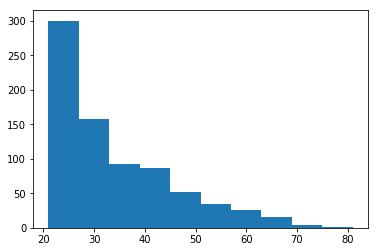

In [10]:
# plot age
fig, ax = plt.subplots()
ax.hist(df["age"])
plt.show()


In [11]:
df['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

In [12]:
df['bmi'].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: bmi, dtype: float64

In [13]:
df[df["age"] > 40].mean()

num_preg          6.639175
glucose_conc    131.740933
diastolic_bp     78.306878
thickness        31.153153
insulin         201.242857
bmi              33.051042
diab_pred         0.473021
age              50.273196
diabetes          0.525773
dtype: float64

In [14]:
# example imputation: replacing all missing insulin values for anyone over 40 
                    # with the mean insulin value of all individuals over 40
from sklearn.preprocessing import Imputer

fill_nan = Imputer(missing_values=np.nan, strategy="mean", axis=0)

df.loc[df["age"] > 40, "insulin"] = fill_nan.fit_transform(df.loc[df["age"] > 40, "insulin"].values.reshape(-1, 1))
X = df.values
print(X[:25])

[[6 148.0 72.0 35.0 201.24285714285713 33.6 0.627 50 True]
 [1 85.0 66.0 29.0 nan 26.6 0.35100000000000003 31 False]
 [8 183.0 64.0 nan nan 23.3 0.672 32 True]
 [1 89.0 66.0 23.0 94.0 28.1 0.16699999999999998 21 False]
 [0 137.0 40.0 35.0 168.0 43.1 2.2880000000000003 33 True]
 [5 116.0 74.0 nan nan 25.6 0.201 30 False]
 [3 78.0 50.0 32.0 88.0 31.0 0.248 26 True]
 [10 115.0 nan nan nan 35.3 0.134 29 False]
 [2 197.0 70.0 45.0 543.0 30.5 0.158 53 True]
 [8 125.0 96.0 nan 201.24285714285713 nan 0.23199999999999998 54 True]
 [4 110.0 92.0 nan nan 37.6 0.191 30 False]
 [10 168.0 74.0 nan nan 38.0 0.537 34 True]
 [10 139.0 80.0 nan 201.24285714285713 27.1 1.4409999999999998 57 False]
 [1 189.0 60.0 23.0 846.0 30.1 0.39799999999999996 59 True]
 [5 166.0 72.0 19.0 175.0 25.8 0.5870000000000001 51 True]
 [7 100.0 nan nan nan 30.0 0.484 32 True]
 [0 118.0 84.0 47.0 230.0 45.8 0.551 31 True]
 [7 107.0 74.0 nan nan 29.6 0.254 31 True]
 [1 103.0 30.0 38.0 83.0 43.3 0.183 33 False]
 [1 115.0 70.0 3

In [ ]:
# Feature Engineering
f = lambda x: x**2            
df[col].map(f)  # for element-wise application)

# or

df[new_col] = df[col_1]/df[col_2]

In [15]:
y = master_dataframe["diabetes"]
y.head()

0     True
1    False
2     True
3    False
4     True
Name: diabetes, dtype: bool

In [16]:
# Transform categorical values to binary
y = y.map({False:0, True:1}).values
y[:5]

array([1, 0, 1, 0, 1])

In [ ]:
# split dataset into test/train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [ ]:
# Write scalers

def standardize(df):
    return (df-df.mean())/df.std()

def normalization(df):
    return (df - df.min())/df.max()-df.min()